## Logistic Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [10]:
base = pd.read_csv('../datasets/eleicao.csv', sep = ';')
base.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


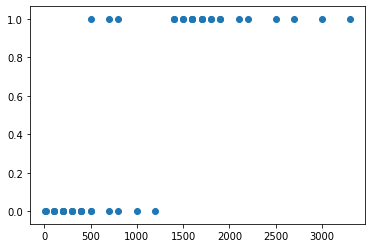

In [12]:
plt.scatter(base.DESPESAS, base.SITUACAO)

In [14]:
base.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


#### Correlation

In [16]:
np.corrcoef(base.DESPESAS, base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

### Logistic Regression Model

In [18]:
X = base.iloc[:, 2].values # DESPESAS
X = X[:, np.newaxis] # Transformação necessária para utilizar o 'X' no 'modelo' - Inclusão de uma coluna.

Y = base.iloc[:, 1].values # SITUACAO

In [37]:
model = LogisticRegression(solver='lbfgs')
model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
model.coef_ # Inclination

array([[0.00298895]])

In [24]:
model.intercept_ # Intercept

array([-2.41847443])

In [30]:
def model_sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [35]:
X_test = np.linspace(10, 3000, 100) # Geração de números aleatórios - 100 números entre 10 e 3000

result = model_sigmoid(X_test * model.coef_ + model.intercept_).ravel()

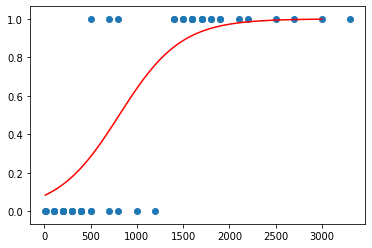

In [38]:
plt.scatter(X, Y)
plt.plot(X_test, result, color = 'red')

#### Prediction

In [42]:
base_predictions = pd.read_csv('../datasets/novos_candidatos.csv', sep = ';')
base_predictions.head()

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900


In [49]:
despesas = base_predictions.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)

In [51]:
predictions = model.predict(despesas)
print(predictions)

[0 0 0 0 0 1 1]


In [52]:
base_predictions = np.column_stack((base_predictions, predictions))
print(base_predictions)

[['A' 0 0]
 ['B' 10 0]
 ['C' 200 0]
 ['D' 500 0]
 ['E' 900 0]
 ['F' 1500 1]
 ['G' 3000 1]]
